## EDA:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
reddit_ds = pd.read_csv(r'C:\Users\10and\OneDrive\Documentos\GitHub\4geeks_finalproject_modeling\data\raw\all_hotscrape_v2(elbueno).csv')

In [4]:
reddit_ds.head(5)

,text,submission_type,subreddit,label
0,Media: Nobody knows what kamala is about\n\nMe...,comment,politics,kamala
1,NYT breaking news that Netanyahu has agreed to...,comment,politics,trumper
2,I love how the stock crash 2 weeks ago was HUG...,comment,politics,trump
3,I was thinking this morning about how freaking...,comment,politics,trumper
4,Conservative in a purple state. I'm voting for...,comment,politics,trump


In [5]:
reddit_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187613 entries, 0 to 187612
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   text             187613 non-null  object
 1   submission_type  187613 non-null  object
 2   subreddit        187613 non-null  object
 3   label            187613 non-null  object
dtypes: object(4)
memory usage: 5.7+ MB


In [6]:
reddit_ds.shape

(187613, 4)

In [7]:
reddit_ds.drop_duplicates()

,text,submission_type,subreddit,label
0,Media: Nobody knows what kamala is about\n\nMe...,comment,politics,kamala
1,NYT breaking news that Netanyahu has agreed to...,comment,politics,trumper
2,I love how the stock crash 2 weeks ago was HUG...,comment,politics,trump
3,I was thinking this morning about how freaking...,comment,politics,trumper
4,Conservative in a purple state. I'm voting for...,comment,politics,trump
...,...,...,...,...
187608,That would apply if Trump hadn’t won and lost....,comment,Republican,trump
187609,How many pardons has trump issued?,comment,Republican,trump
187610,Well Trumps the felon,comment,Republican,trump
187611,Should post this all over the subs who keep bl...,comment,Republican,kamala


In [8]:
# Creamos la siguiente función para poder visualizar la distribución de la longitud de los textos
def safe_len(x):
    if isinstance(x, str):
        return len(x)
    else:
        return 0

In [9]:
# Aplicamos la función a la columna 'text' para crear una nueva columna con la longitud
reddit_ds['text'] = reddit_ds['text'].apply(safe_len)

In [10]:
# Revisa los tipos de datos en la columna 'text'
print(reddit_ds['text'].apply(type).value_counts())

text
<class 'int'>    187613
Name: count, dtype: int64


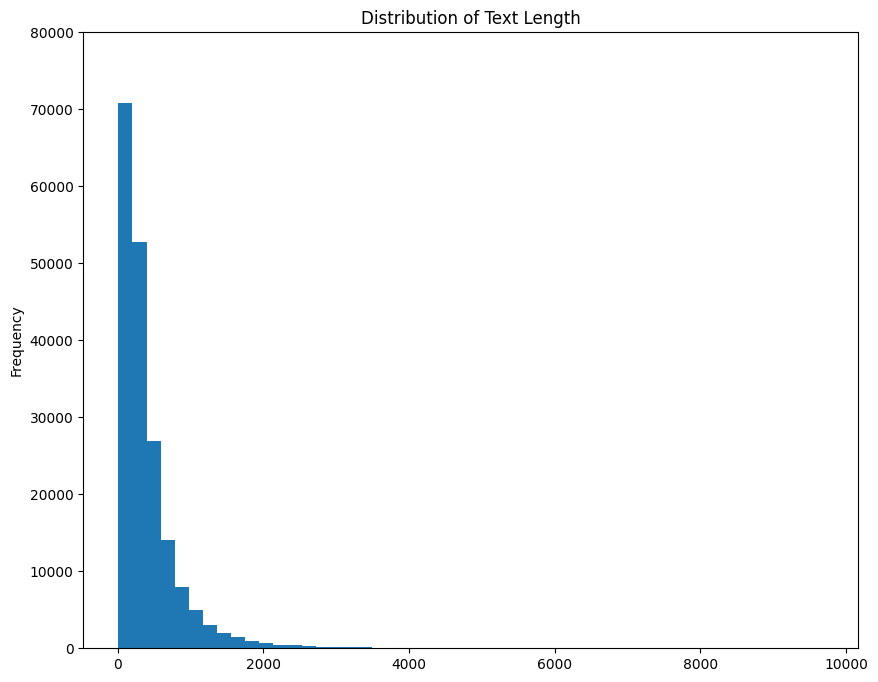

In [11]:
# Visualizamos la distribución de la longitud de los textos
plt.figure(figsize=(10, 8))
reddit_ds['text'].plot(kind='hist', bins=50, title='Distribution of Text Length')
# Establecemos el límite del eje X
#plt.xlim(0, 25000)
# Ajustamos el límite del eje Y si es necesario
plt.ylim(0, 80000)  # Ajusta este valor según la cantidad de artículos que tengas
plt.show()

In [13]:
# Nos aseguramos de que la columna 'text' contiene textos y no números:
#reddit_ds['text'] = reddit_ds['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
# Ahora podemos calcular los valores mínimos, máximos y la media de las longitudes:
min_length = reddit_ds['text'].min()
max_length = reddit_ds['text'].max()
median_length = reddit_ds['text'].median()
print(f'El comentario con menor extensión es de {min_length} carácteres.')
print(f'El comentario con mayor extensión es de {max_length} carácteres.')
print(f"La media de extensión por caracteres en la columna 'text' es de {median_length}.")

El comentario con menor extensión es de 11 carácteres.
El comentario con mayor extensión es de 9681 carácteres.
La media de extensión por caracteres en la columna 'text' es de 273.0.
